In [1]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']
train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


print(train_dataset)
print(test_dataset)

<_PaddedBatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PaddedBatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.5553 - loss: 0.6789 - val_accuracy: 0.7654 - val_loss: 0.5106
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.8248 - loss: 0.4052 - val_accuracy: 0.8498 - val_loss: 0.3789
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 397s 4s/step - accuracy: 0.8946 - loss: 0.2744 - val_accuracy: 0.8408 - val_loss: 0.3906
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.9228 - loss: 0.2145 - val_accuracy: 0.8534 - val_loss: 0.3836
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.9438 - loss: 0.1609 - val_accuracy: 0.8510 - val_loss: 0.4266
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 367s 4s/step - accuracy: 0.9350 - loss: 0.1718 - val_accuracy: 0.8252 - val_loss: 0.4519
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.9482 - loss: 0.1444 - val_accuracy: 0.8463 - val_loss: 0.5153
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.9748 - loss: 0.0810 - val_accuracy: 0.8332 - v

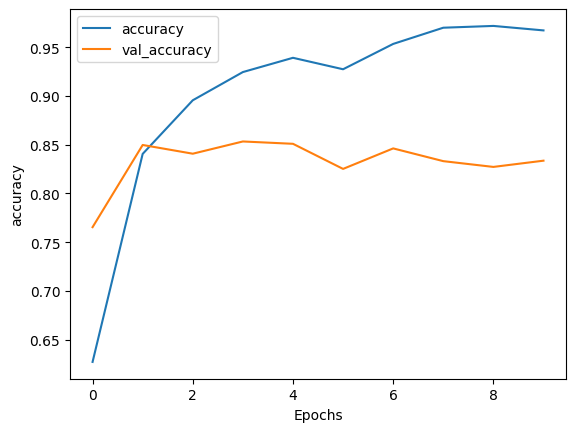

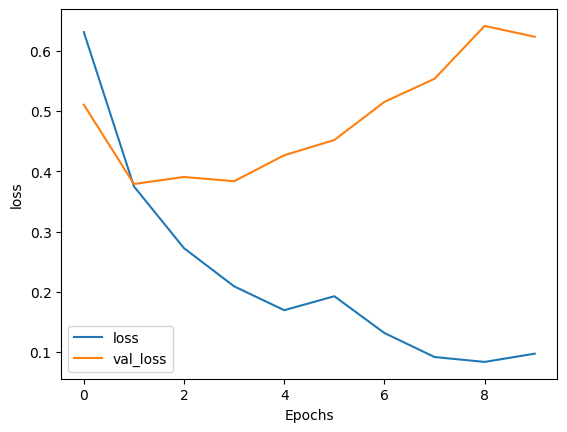

In [11]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")